<a href="https://www.kaggle.com/code/kunalkishore01/handling-missing-value-with-titanic-dataset?scriptVersionId=216381869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/d/kunalkishore01/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df.drop(columns =['PassengerId','Name','Ticket','Cabin','Parch'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [5]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

Age column has 177 Missing Values

In [6]:
X_train=df.drop(columns = ['Survived'])
y_train=df['Survived']

In [7]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,3,male,35.0,0,8.0500,S


In [8]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
print(mean_age)
print(median_age)

29.69911764705882
28.0


In [9]:
X_train['Age_Mean']=X_train['Age'].fillna(mean_age)
X_train['Age_Median']=X_train['Age'].fillna(median_age)

In [10]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,Age_Mean,Age_Median
0,3,male,22.0,1,7.2500,S,22.0,22.0
1,1,female,38.0,1,71.2833,C,38.0,38.0
2,3,female,26.0,0,7.9250,S,26.0,26.0
3,1,female,35.0,1,53.1000,S,35.0,35.0
4,3,male,35.0,0,8.0500,S,35.0,35.0


In [11]:
X_train.sample(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Age_Mean,Age_Median
636,3,male,32.0,0,7.9250,S,32.000000,32.0
94,3,male,59.0,0,7.2500,S,59.000000,59.0
56,2,female,21.0,0,10.5000,S,21.000000,21.0
101,3,male,NaN,0,7.8958,S,29.699118,28.0
364,3,male,NaN,1,15.5000,Q,29.699118,28.0


In [12]:
print("original Age variance : ",X_train['Age'].var())
print("Mean Imputed Age variance : ",X_train['Age_Mean'].var())
print("original Median Imputed Age variance : ",X_train['Age_Median'].var())

original Age variance :  211.01912474630802
Mean Imputed Age variance :  169.0523999372108
original Median Imputed Age variance :  169.51249827942345


Text(0.5, 1.0, 'Distribution')

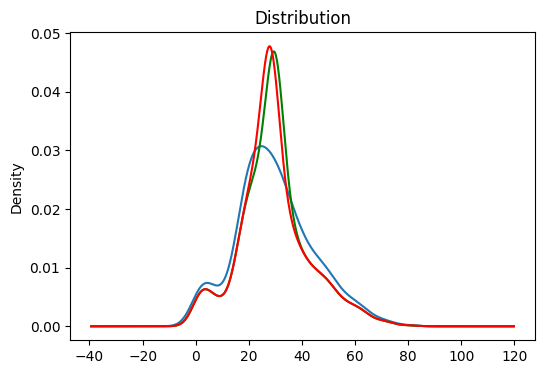

In [13]:
plt.figure(figsize = (6,4))
ax=plt.subplot(1,1,1)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_Mean'].plot(kind='kde',ax=ax, color = 'green')
X_train['Age_Median'].plot(kind='kde',ax=ax, color = 'red')
plt.title("Distribution")


<Axes: ylabel='Density'>

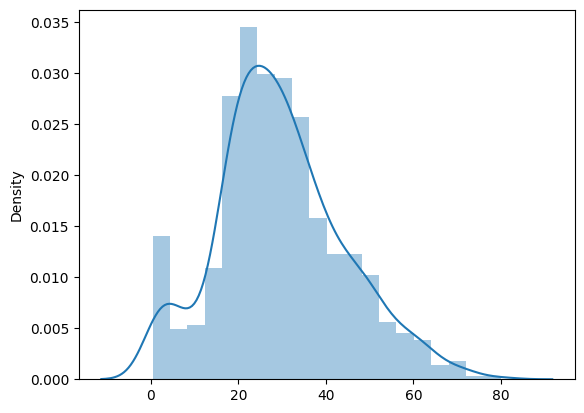

In [14]:
sns.distplot(x= X_train['Age'],kde=True)

<Axes: >

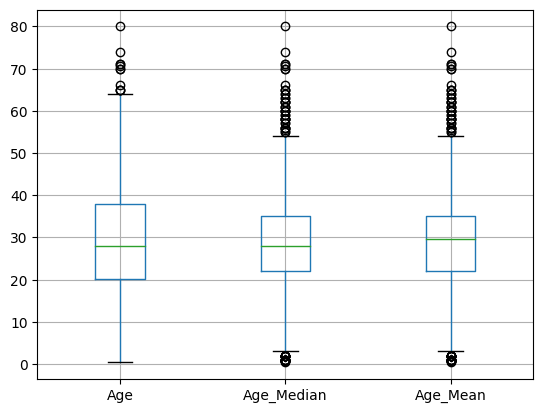

In [15]:
X_train[['Age','Age_Median','Age_Mean']].boxplot()

With the mean and median imputation - 1)Age distribution gets changed , due to mean and median - it got most of the missing data points now get placed in the middle range (near mean/ median) 

In [16]:
X_train['Age_Imputed']=X_train['Age']
# X_train.sample(10)
#randome numbers selcted from the sample of non NaN sample of X train
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

# here random sample generated would change while taking input from the user in production , to control this random sample ned tonbe generated using input features on input web 

In [17]:
X_train.sample(10)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Age_Mean,Age_Median,Age_Imputed
474,3,female,22.0,0,9.8375,S,22.0,22.0,22.0
393,1,female,23.0,1,113.2750,C,23.0,23.0,23.0
874,2,female,28.0,1,24.0000,C,28.0,28.0,28.0
844,3,male,17.0,0,8.6625,S,17.0,17.0,17.0
660,1,male,50.0,2,133.6500,S,50.0,50.0,50.0
155,1,male,51.0,0,61.3792,C,51.0,51.0,51.0
432,2,female,42.0,1,26.0000,S,42.0,42.0,42.0
21,2,male,34.0,0,13.0000,S,34.0,34.0,34.0
56,2,female,21.0,0,10.5000,S,21.0,21.0,21.0
23,1,male,28.0,0,35.5000,S,28.0,28.0,28.0


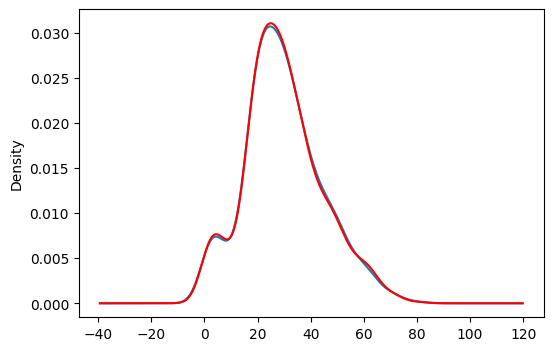

----------------------------------
Actual Variance of Age: 211.01912474630802
Post Randam Sample Imputation -Variance of Age: 212.13746253319715


In [18]:
plt.figure(figsize = (6,4))
ax=plt.subplot(1,1,1)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_Imputed'].plot(kind='kde',ax=ax,color='red')
plt.show()
print("----------------------------------")
print("Actual Variance of Age:" ,X_train['Age'].var())
print("Post Randam Sample Imputation -Variance of Age:" ,X_train['Age_Imputed'].var())

In [19]:
print(X_train[['Fare','Age','Age_Imputed']].cov())

print("-----------------------------------")
print("""There is very lesser impact on distribution after random sample imputation but
Covariance of age with fare or other feature got impacted - it has got decreased; 
to mitigate this we ll try with KNN imputation techniques""")

                    Fare         Age  Age_Imputed
Fare         2469.436846   73.849030    55.417795
Age            73.849030  211.019125   211.019125
Age_Imputed    55.417795  211.019125   212.137463
-----------------------------------
There is very lesser impact on distribution after random sample imputation but
Covariance of age with fare or other feature got impacted - it has got decreased; 
to mitigate this we ll try with KNN imputation techniques


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LogisticRegression

In [21]:
num_feature = ['Age','Fare']
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
])
cat_feature = ['Embarked','Sex']
cat_transformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_feature),
        ('cat',cat_transformer,cat_feature)
    ]
)

In [23]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [24]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [25]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV 
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  ## always use __ double underscore here
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],  
    'classifier__C': [0.1, 1.0, 10, 100]  # Regularization strength for LogisticRegression
}

grid_search = GridSearchCV(model, param_grid, cv=10)

In [26]:
grid_search.fit(X_train, y_train)
print(f"Best_Param:")
grid_search.best_params_

Best_Param:


{'classifier__C': 0.1,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__num__imputer__strategy': 'mean'}

# KNN Imputation